In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats
import pylab as py 
%matplotlib inline

# Downloading and Cleaning the Data

In [2]:
YoY = pd.read_csv("YoY_AirDNA.csv") # Dataset made public by AirDNA

YoY = YoY.reset_index().iloc[1:len(YoY)].rename(columns={
    "Top Cities by 2020 Reservations (YoY Comparison )":"City", 
    "Unnamed: 1":"State", 
    "Unnamed: 2":"2019", 
    "Unnamed: 3":"2020", 
    "Unnamed: 5":"YoY % Change"}).drop(["index", "Unnamed: 4"], axis=1)

YoY["YoY % Change"] = YoY["YoY % Change"].astype(float)

YoY = YoY.dropna() # Clean out NaN values (1 row)

YoY["YoY Raw Growth Volume"] = YoY["2020"] - YoY["2019"]
YoY = YoY[["City", "State", "2019", "2020", "YoY Raw Growth Volume", "YoY % Change"]]

YoY.head()

,City,State,2019,2020,YoY Raw Growth Volume,YoY % Change
1,Shaver Lake,California,564,1000.0,436.0,0.773050
2,Holly Ridge,North Carolina,521,1003.0,482.0,0.925144
3,Pasadena,California,1292,1003.0,-289.0,-0.223684
4,Fairbanks,Alaska,1014,1010.0,-4.0,-0.003945
5,Grand Rapids,Michigan,1269,1011.0,-258.0,-0.203310


# Exploratory Data Analysis and Market Sizing
**Questions:** Which states have the most Airbnb market locations? Which states receive the most Airbnb bookings? How do these metrics compare between 2019 and 2020?

In [3]:
YoY["State"].value_counts().head(10)

California        70
Florida           62
North Carolina    31
Colorado          30
Texas             27
South Carolina    15
Georgia           15
Arizona           15
Oregon            14
Puerto Rico       13
Name: State, dtype: int64

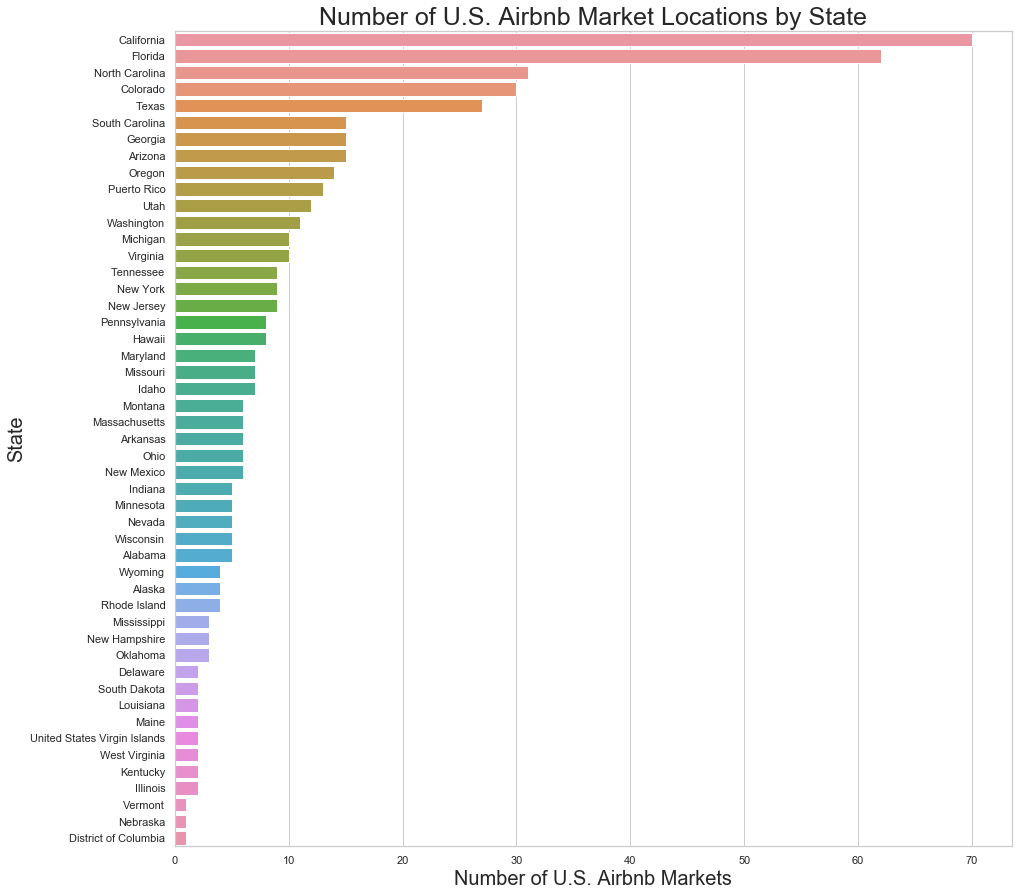

In [8]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

count_by_states = sns.countplot(data=YoY, y="State", order=YoY["State"].value_counts(ascending=False).index)
count_by_states.set_ylabel("State", fontsize=20)
count_by_states.set_xlabel("Number of U.S. Airbnb Markets", fontsize=20)
count_by_states.set_title("Number of U.S. Airbnb Market Locations by State", fontsize=25);

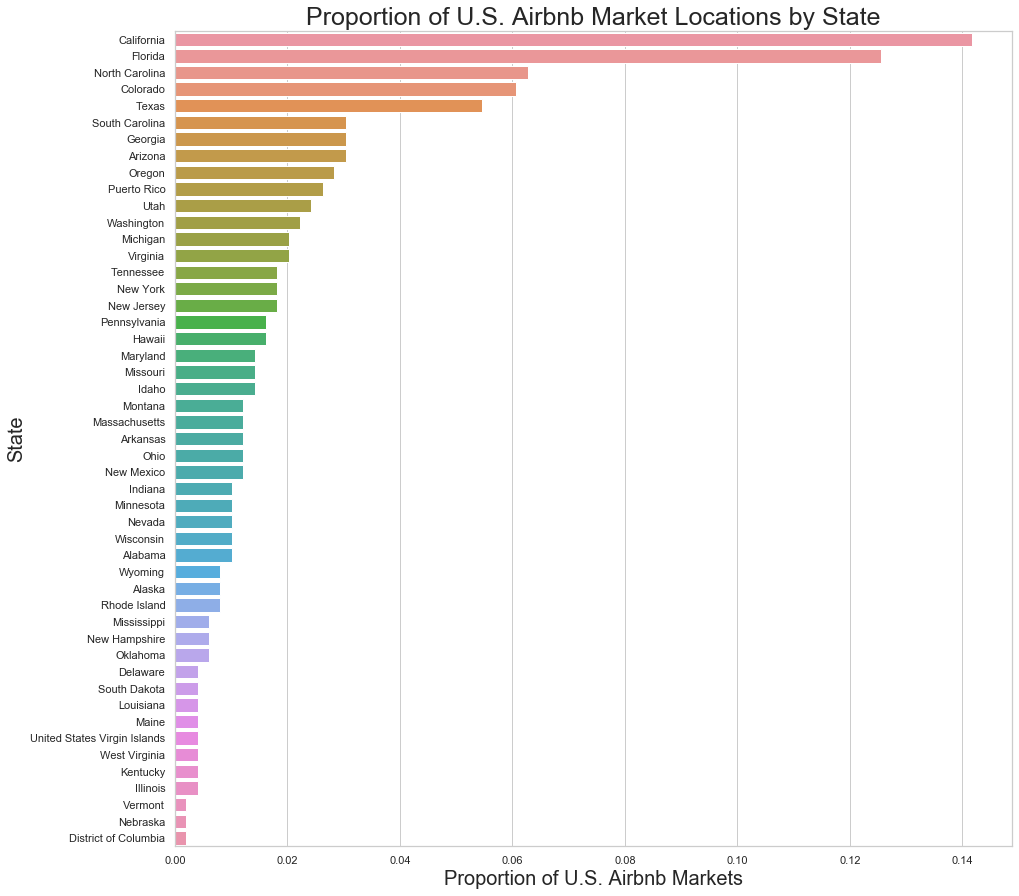

In [9]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

state_props = (YoY["State"].value_counts()/len(YoY)).to_frame().reset_index()
state_props = state_props.rename(columns={"index":"State", "State":"Proportion"})

props_by_state = sns.barplot(data=state_props, x="Proportion", y="State")
props_by_state.set_ylabel("State", fontsize=20)
props_by_state.set_xlabel("Proportion of U.S. Airbnb Markets", fontsize=20)
props_by_state.set_title("Proportion of U.S. Airbnb Market Locations by State", fontsize=25);

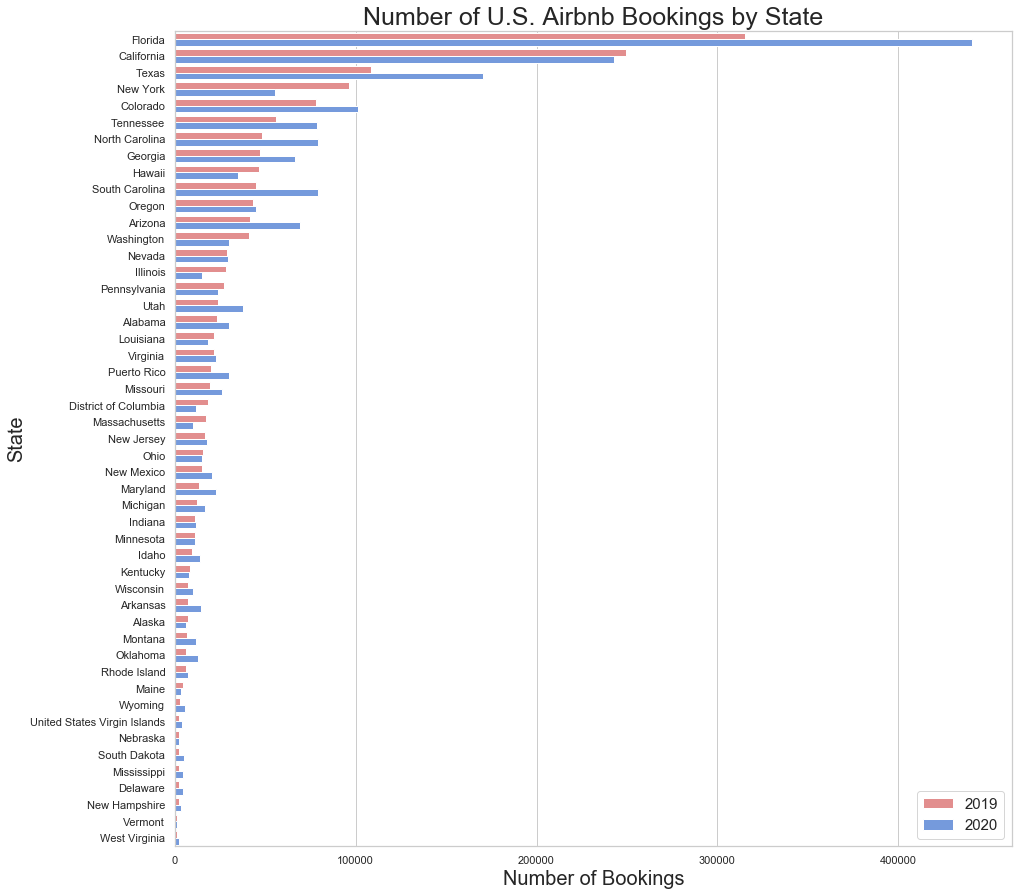

In [10]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

Sums_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1).sort_values("2019", ascending=False)
Sums_byState = pd.melt(Sums_byState, id_vars="State", var_name="Year", value_name="Number of Bookings")
sns.barplot(data=Sums_byState, x="Number of Bookings", y="State", hue="Year", palette=["lightcoral", "cornflowerblue"])

plt.xlabel("Number of Bookings", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Number of U.S. Airbnb Bookings by State", fontsize=25)
plt.legend(fontsize=15);

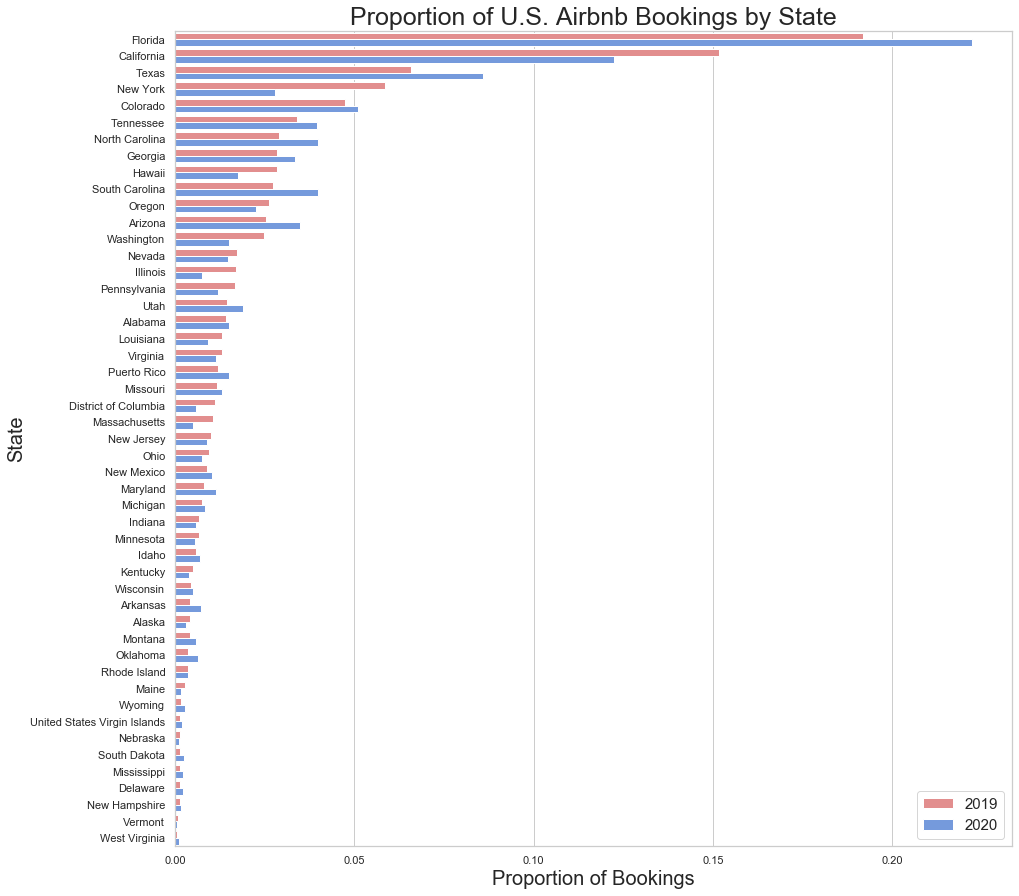

In [11]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid") 

Props_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1)
Props_byState["2019"] = Props_byState["2019"]/sum(Props_byState["2019"])
Props_byState["2020"] = Props_byState["2020"]/sum(Props_byState["2020"])
Props_byState = Props_byState.sort_values(by="2019", ascending=False)
Props_byState = pd.melt(Props_byState, id_vars="State", var_name="Year", value_name="Proportion of Bookings")

sns.barplot(data=Props_byState, x="Proportion of Bookings", y="State", hue="Year", palette=["lightcoral", "cornflowerblue"])

plt.xlabel("Proportion of Bookings", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Proportion of U.S. Airbnb Bookings by State", fontsize=25)
plt.legend(fontsize=15);

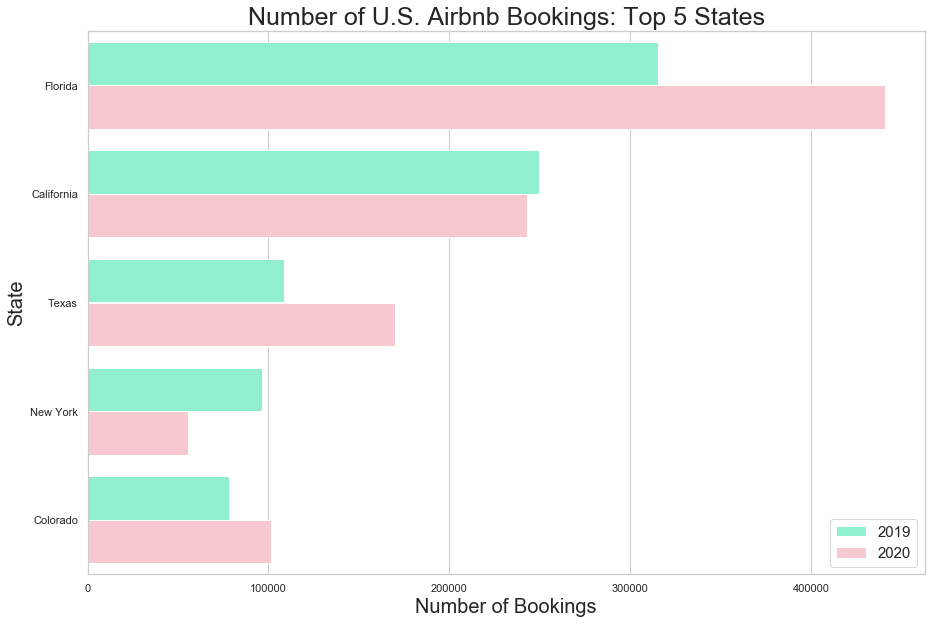

In [12]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

Sums_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1).sort_values(by="2019", ascending=False)
Sums_byState = pd.melt(Sums_byState, id_vars="State", var_name="Year", value_name="Number of Bookings")
Sums_FiveStates = Sums_byState.set_index("State").loc[["Florida","California","Texas","New York","Colorado"]].reset_index()

sns.barplot(data=Sums_FiveStates, x="Number of Bookings", y="State", hue="Year", palette=["aquamarine", "pink"])

plt.xlabel("Number of Bookings", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Number of U.S. Airbnb Bookings: Top 5 States", fontsize=25)
plt.legend(fontsize=15);

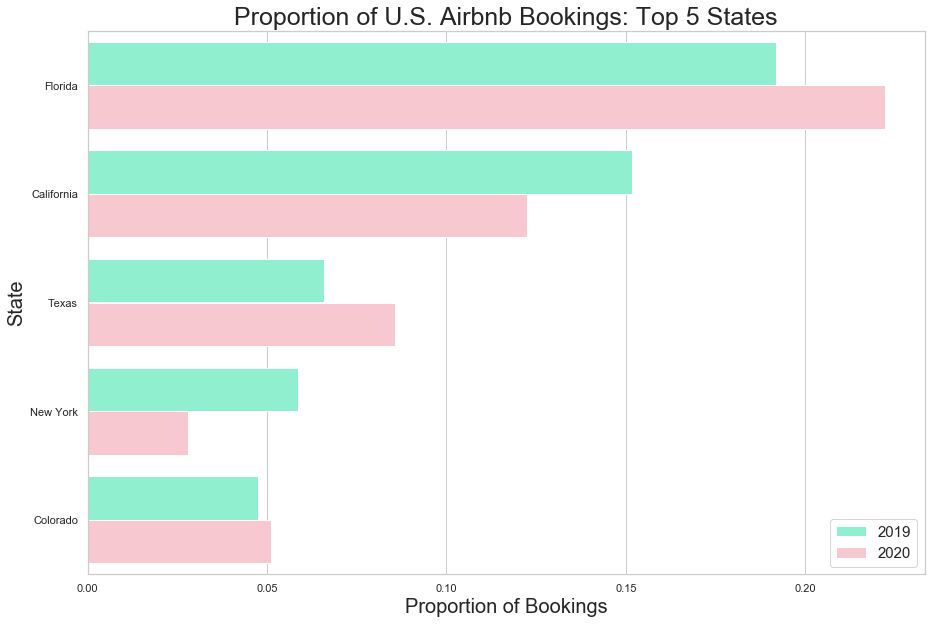

In [13]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

Props_byState = YoY.groupby("State").sum().reset_index().drop(["YoY Raw Growth Volume", "YoY % Change"], axis=1)
Props_byState["2019"] = Props_byState["2019"]/sum(Props_byState["2019"])
Props_byState["2020"] = Props_byState["2020"]/sum(Props_byState["2020"])
Props_byState = Props_byState.sort_values(by="2019", ascending=False)
Props_byState = pd.melt(Props_byState, id_vars="State", var_name="Year", value_name="Proportion of Bookings")
Props_FiveStates = Props_byState.set_index("State").loc[["Florida","California","Texas","New York","Colorado"]].reset_index()

sns.barplot(data=Props_FiveStates, x="Proportion of Bookings", y="State", hue="Year", palette=["aquamarine", "pink"])

plt.xlabel("Proportion of Bookings", fontsize=20)
plt.ylabel("State", fontsize=20)
plt.title("Proportion of U.S. Airbnb Bookings: Top 5 States", fontsize=25)
plt.legend(fontsize=15);

In [14]:
Grouped_YoY = YoY.groupby(["State", "City"]).apply(sum).drop(["City", "State"], axis=1)
Grouped_YoY.head(10)

2019     2020  YoY Raw Growth Volume  YoY % Change
State   City                                                               
Alabama Birmingham       1409   1449.0                   40.0      0.028389
        Dauphin Island    663   1307.0                  644.0      0.971342
        Gulf Shores     10003  15570.0                 5567.0      0.556533
        Mobile            846   1099.0                  253.0      0.299054
        Orange Beach    10378  10620.0                  242.0      0.023319
Alaska  Anchorage        3638   2441.0                -1197.0     -0.329027
        Fairbanks        1014   1010.0                   -4.0     -0.003945
        Homer            1192   1382.0                  190.0      0.159396
        Seward           1267   1489.0                  222.0      0.175217
Arizona Chandler          608   1014.0                  406.0      0.667763

In [15]:
Grouped_YoY.isnull().values.any() # Check again if the dataframe contains any NaN values

False

In [16]:
Pos_Growth = Grouped_YoY.loc[Grouped_YoY["YoY Raw Growth Volume"]>0]
Neg_Growth = Grouped_YoY.loc[Grouped_YoY["YoY Raw Growth Volume"]<0]

print(f'{len(Pos_Growth)} out of {len(Grouped_YoY)}, or {round((len(Pos_Growth)/len(Grouped_YoY))*100,2)}% of U.S. Airbnb Markets achieved positive year-on-year growth in the number of bookings from 2019 to 2020.')
print(f'{len(Neg_Growth)} out of {len(Grouped_YoY)}, or {round((len(Neg_Growth)/len(Grouped_YoY))*100,2)}% of U.S. Airbnb Markets achieved negative year-on-year growth in the number of bookings from 2019 to 2020.')

402 out of 494, or 81.38% of U.S. Airbnb Markets achieved positive year-on-year growth in the number of bookings from 2019 to 2020.
92 out of 494, or 18.62% of U.S. Airbnb Markets achieved negative year-on-year growth in the number of bookings from 2019 to 2020.


In [17]:
print(f'There are {sum(YoY["2020"])} Airbnb bookings so far in 2020.')
print(f'There are {sum(YoY["2019"])} Airbnb bookings from this same time in 2019.')

There are 1984206.0 Airbnb bookings so far in 2020.
There are 1644091 Airbnb bookings from this same time in 2019.


In [18]:
print(f'There are approximately {round((abs(sum(YoY["2019"])-sum(YoY["2020"]))/sum(YoY["2019"]))*100,2)}% more Airbnb bookings so far in 2020 compared to this same time frame in 2019.')

There are approximately 20.69% more Airbnb bookings so far in 2020 compared to this same time frame in 2019.


# Statistical Analysis: Wilcoxon Signed-Rank Test
**Question:** Is the total number of Airbnb bookings so far in 2020 "statistically significant" from the total number of Airbnb bookings from this same time in 2019?

The **Wilcoxon Signed-Rank Test** is a statistical hypothesis test that is the nonparametric counterpart to the *Paired Student's t-test*, also called the *Matched Pairs t-test*. The test is used to compare two related or matched samples on a single sample to assess whether their underlying distributions differ. (Here, the Wilcoxon Signed-Rank Test is nonparametric because it does not require the prerequisite or assumption that the data come from a normal distribution.)

The test rests on three key assumptions:
1. Data are paired and come from the same population. Hence, the two "sample sets" of data are paired, or matched.
2. Each pair of the data is chosen independently at random from the population.
3. The data must be measured on at least an interval or ordinal scale (that is, a scale that dictates that certain values are greater than or less than others). This is necessary in order to quantitatively compare the two values in each data pair.

Let $N$ be the number of pairs on our data, which is equivalent to our sample size. Thus, there are a total of $2N$ data points, or observations. For pairs $i=1,2,...,N$ let $x_{1,i}$ and $x_{2,i}$ denote the measurements for the $i^{th}$ pair. Here, one data pair is an Airbnb market location with two metrics: for the $i^{th}$ city, let $x_{2,i}$ be the number of Airbnb bookings that location has received so far in 2020, and let $x_{1,i}$ be the number of Airbnb bookings that location received during the corresponding time in 2019.

For example, the following cell illustrates a data pair for Palm Springs, California:

In [19]:
Grouped_YoY[["2019", "2020"]].loc[[("California", "Palm Springs")]]

,,2019,2020
State,City,,
California,Palm Springs,5703,10517.0


Let our **Null and Alternative Hypotheses** be as follows:

$H_0:$ The difference between the data points of each pair follows a symmetric distribution about zero. That is, the two sets of measurements $x_{1,i}$ and $x_{2,i}$ for all pairs $i=1,2,...,N$ come from the same distribution. In our case the null hypothesis states that the number of Airbnb bookings in 2020 is *not significantly different* than the number of Airbnb bookings from this same time in 2019.

$H_1:$ The difference between the data points of each pair does NOT follow a symmetric distribution about zero. That is, the two sets of measurements $x_{1,i}$ and $x_{2,i}$ for all pairs $i=1,2,...,N$ come from different distributions. In our case the alternative hypothesis states that the number of Airbnb bookings in 2020 is *significantly different* than the number of Airbnb bookings from this same time in 2019. More specifically, our Wilcoxon Signed-Rank test is **one-sided** rather than two-sided; that is, we want to evaluate whether or not the number of Airbnb bookings in 2020 is *significantly GREATER* than the number of Airbnb bookings from this same time in 2019.

In [20]:
n_1 = len(Grouped_YoY["2019"])
n_2 = len(Grouped_YoY["2020"])
N = n_1 + n_2
N

988

**Step 1:** For pairs $i=1,2,...,N$ calculate the absolute difference between the two paired data points $|x_{2,i}-x_{1,i}|$ and the sign of the original difference: -1 indicates the difference was negative, +1 indicates the difference was positive, and 0 indicates no difference between $x_{1,i}$ and $x_{2,i}$ for that $i^{th}$ pair.

In [21]:
Wilcoxon_YoY = Grouped_YoY.drop("YoY % Change", axis=1)
Wilcoxon_YoY["Abs"] = abs(Wilcoxon_YoY["YoY Raw Growth Volume"])

def sign_func(diffs):
    signs = []
    for diff in diffs:
        if diff > 0:
            sign = 1
        elif diff < 0:
            sign = -1
        else:
            sign = 0
        signs.append(sign)
    return signs

Wilcoxon_YoY["Sign"] = sign_func(Wilcoxon_YoY["YoY Raw Growth Volume"])
Wilcoxon_YoY.head()

2019     2020  YoY Raw Growth Volume     Abs  Sign
State   City                                                               
Alabama Birmingham       1409   1449.0                   40.0    40.0     1
        Dauphin Island    663   1307.0                  644.0   644.0     1
        Gulf Shores     10003  15570.0                 5567.0  5567.0     1
        Mobile            846   1099.0                  253.0   253.0     1
        Orange Beach    10378  10620.0                  242.0   242.0     1

**Step 2:** Exclude pairs where the value $|x_{2,i}-x_{1,i}|$ in the `Abs` column equals 0. Let the number of pais that remain be $N_r$. However in our case, no such pair exists, so $N_r=N$.

In [22]:
sum(Wilcoxon_YoY["Sign"]==0)

0

**Step 3:** Order the $N_r$ pairs from the smallest absolute difference to the largest.

In [23]:
Wilcoxon_YoY = Wilcoxon_YoY.sort_values(by="Abs", ascending=True)
Wilcoxon_YoY.head()

,,2019,2020,YoY Raw Growth Volume,Abs,Sign
State,City,,,,,
Wisconsin,Milwaukee,3295,3296.0,1.0,1.0,1
Alaska,Fairbanks,1014,1010.0,-4.0,4.0,-1
California,Mariposa,1021,1028.0,7.0,7.0,1
Florida,Tavernier,1188,1180.0,-8.0,8.0,-1
North Carolina,Greensboro,1198,1185.0,-13.0,13.0,-1


**Step 4:** Rank the pairs by their absolute difference, in ascending order. Let $R_i$ denote the ranking of the $i^{th}$ pair.

In [24]:
Wilcoxon_YoY["R"] = np.arange(1, len(Wilcoxon_YoY)+1)
Wilcoxon_YoY.head()

,,2019,2020,YoY Raw Growth Volume,Abs,Sign,R
State,City,,,,,,
Wisconsin,Milwaukee,3295,3296.0,1.0,1.0,1,1
Alaska,Fairbanks,1014,1010.0,-4.0,4.0,-1,2
California,Mariposa,1021,1028.0,7.0,7.0,1,3
Florida,Tavernier,1188,1180.0,-8.0,8.0,-1,4
North Carolina,Greensboro,1198,1185.0,-13.0,13.0,-1,5


**Step 5:** Calculate the Wilcoxon Signed-Rank test statistic $W$, where

In [25]:
Wilcoxon_YoY["Signed R"] = Wilcoxon_YoY["R"] * Wilcoxon_YoY["Sign"]
Wilcoxon_YoY.head()

,,2019,2020,YoY Raw Growth Volume,Abs,Sign,R,Signed R
State,City,,,,,,,
Wisconsin,Milwaukee,3295,3296.0,1.0,1.0,1,1,1
Alaska,Fairbanks,1014,1010.0,-4.0,4.0,-1,2,-2
California,Mariposa,1021,1028.0,7.0,7.0,1,3,3
Florida,Tavernier,1188,1180.0,-8.0,8.0,-1,4,-4
North Carolina,Greensboro,1198,1185.0,-13.0,13.0,-1,5,-5


In [26]:
sum((Wilcoxon_YoY.loc[Wilcoxon_YoY["Signed R"]<0])["Signed R"]), sum((Wilcoxon_YoY.loc[Wilcoxon_YoY["Signed R"]>0])["Signed R"])

(-22442, 99823)

In [27]:
((len(Grouped_YoY)+1)*len(Grouped_YoY)+1)/2

122265.5

In [28]:
from scipy.stats import wilcoxon
w, p = wilcoxon(x=Grouped_YoY["2020"], y=Grouped_YoY["2019"], alternative="greater")
w, p

(99824.5, 1.7820747171565283e-34)

In [29]:
22442+99823

122265

# Market Segmentation
**Question:**
How might we identify and segment SpacePlace's top ten target markets for product launch? Here we want to pinpoint these markets by considering two key metrics made available to us: `YoY % Change` and `YoY Raw Growth Volume`; that is, which specific values of these metrics are "statistically significant" or meaningful in this context and for our purposes.

### Considering `YoY % Change`

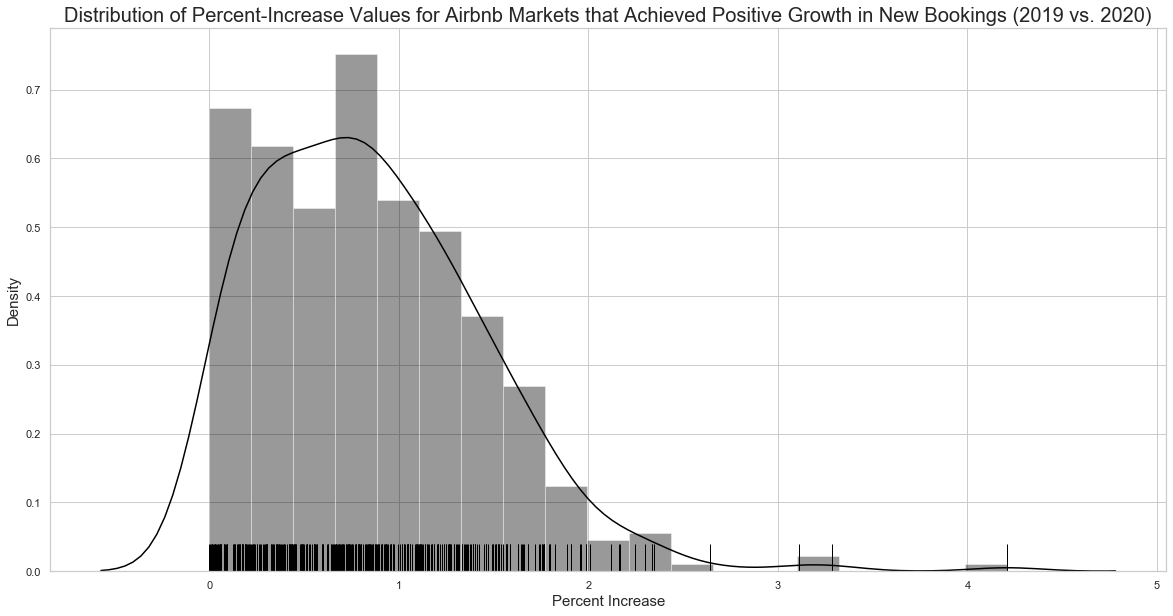

In [30]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid") 

YoY_density = sns.distplot(Pos_Growth["YoY % Change"], kde=True, rug=True, color="black")
YoY_density.set_ylabel("Density", fontsize=15)
YoY_density.set_xlabel("Percent Increase", fontsize=15)
YoY_density.set_title(
    "Distribution of Percent-Increase Values for Airbnb Markets that Achieved Positive Growth in New Bookings (2019 vs. 2020)",
fontsize=20);

In [31]:
Sorted_byPercent = Pos_Growth.sort_values(by="YoY % Change", ascending=False)
Sorted_byPercent.quantile(0.90)

2019                     5319.900000
2020                     8501.500000
YoY Raw Growth Volume    3055.200000
YoY % Change                1.623859
Name: 0.9, dtype: float64

In [32]:
Top10_PercentGrowth = Sorted_byPercent[
    Sorted_byPercent["YoY % Change"]>=Sorted_byPercent.quantile(0.90)["YoY % Change"]]

Top10_PercentGrowth

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
Maryland,Mc Henry,578,3011.0,2433.0,4.209343
North Carolina,Atlantic Beach,330,1414.0,1084.0,3.284848
Maryland,Oakland,727,2989.0,2262.0,3.111417
Texas,Spicewood,368,1341.0,973.0,2.644022
Oklahoma,Broken Bow,2358,7891.0,5533.0,2.346480
California,Yosemite National Pa,938,3130.0,2192.0,2.336887
New Mexico,Red River,589,1964.0,1375.0,2.334465
Montana,Red Lodge,385,1270.0,885.0,2.298701
Maryland,Swanton,345,1120.0,775.0,2.246377


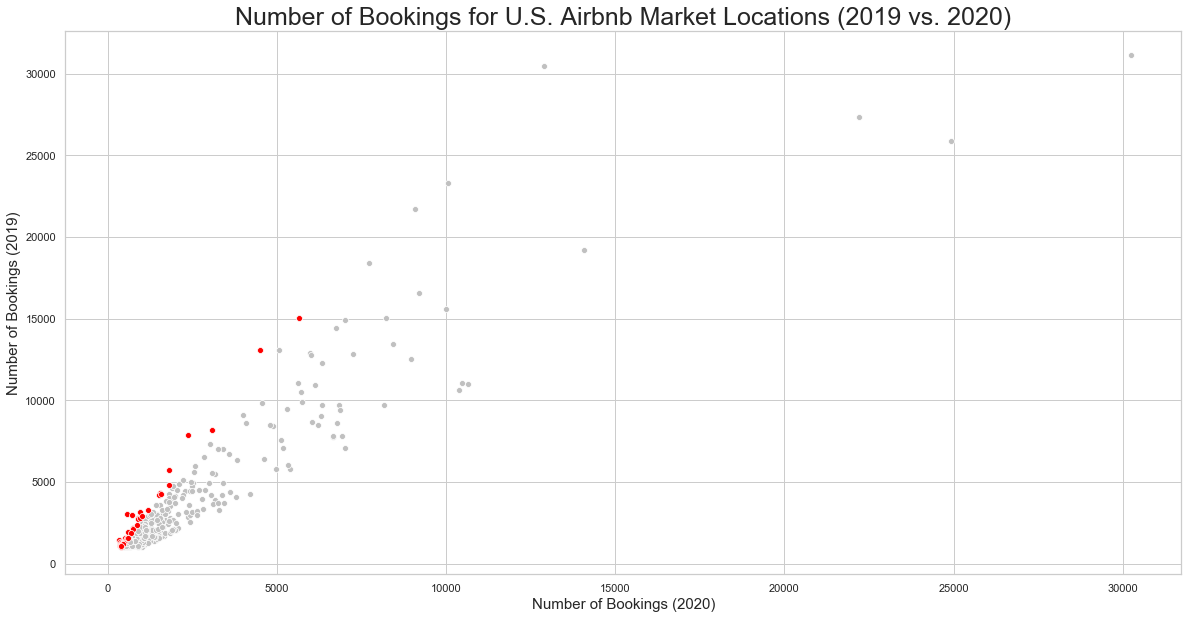

In [33]:
plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(Pos_Growth["2019"], Pos_Growth["2020"], color="silver");
Top10_YoYscatter = sns.scatterplot(Top10_PercentGrowth["2019"], Top10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_title("Number of Bookings for U.S. Airbnb Market Locations (2019 vs. 2020)", fontsize=25);

## Red = Top 5% Growth, markets with "unsustainable" YoY %-change growth
## i.e. Airbnb market locations not very popular pre-COVID, but extremely popular relatively during COVID-19.

## So what if we took the Middle 10%?
## To represent Airbnb markets that saw a significantly increased number of bookings from 2019 to 2020, but were still substantially popular in 2019.

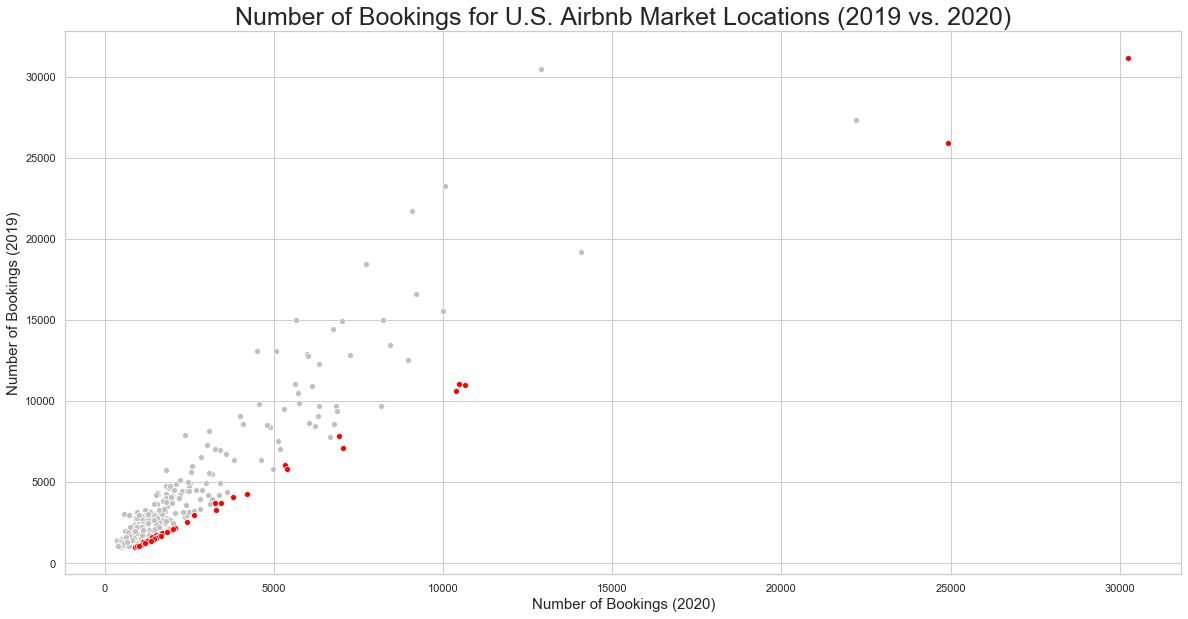

In [34]:
Bottom10_PercentGrowth = Sorted_byPercent[
    Sorted_byPercent["YoY % Change"]<=Sorted_byPercent.quantile(0.10)["YoY % Change"]]

plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(Pos_Growth["2019"], Pos_Growth["2020"], color="silver");
Bottom10_YoYscatter = sns.scatterplot(Bottom10_PercentGrowth["2019"], Bottom10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_title("Number of Bookings for U.S. Airbnb Market Locations (2019 vs. 2020)", fontsize=25);

## Red = Bottom 10% Growth, markets with the smallest or most marginal YoY %-change growth
## i.e. Airbnb market locations neither particularly or notably popular both pre-COVID in 2019 and during COVID in 2020.

In [35]:
# 45th percentile
Sorted_byPercent.quantile(0.475)

2019                     1098.950000
2020                     1842.425000
YoY Raw Growth Volume     745.475000
YoY % Change                0.750875
Name: 0.475, dtype: float64

In [36]:
# 55th percentile
Sorted_byPercent.quantile(0.525)

2019                     1200.200000
2020                     2021.775000
YoY Raw Growth Volume     822.050000
YoY % Change                0.827455
Name: 0.525, dtype: float64

In [37]:
Middle10_PercentGrowth = Sorted_byPercent[
    (Sorted_byPercent["YoY % Change"]>=Sorted_byPercent.quantile(0.45)["YoY % Change"]) &
(Sorted_byPercent["YoY % Change"]<=Sorted_byPercent.quantile(0.55)["YoY % Change"])]

Middle10_PercentGrowth

2019     2020  YoY Raw Growth Volume  \
State          City                                                       
Mississippi    Biloxi               631   1171.0                  540.0   
Wisconsin      Wisconsin Dells     1449   2680.0                 1231.0   
Texas          Terlingua            564   1042.0                  478.0   
               College Station      696   1285.0                  589.0   
California     Palm Springs        5703  10517.0                 4814.0   
               Cambria              869   1600.0                  731.0   
Arizona        Gilbert              686   1260.0                  574.0   
Georgia        Tybee Island        2420   4442.0                 2022.0   
Florida        Ormond Beach         667   1221.0                  554.0   
Washington     Leavenworth         2191   4009.0                 1818.0   
South Carolina Hilton Head Island  8230  15019.0                 6789.0   
Arkansas       Rogers               570   1039.0                  469.0   
Utah           Washington          1140   2062.0                  922.0   
               Moab                3085   5561.0                 2476.0   
Florida        Saint Petersburg    9206  16583.0                 7377.0   
Nevada         Incline Village     1553   2794.0                 1241.0   
Colorado       Avon                1781   3196.0                 1415.0   
Florida        Clearwater          1176   2108.0                  932.0   
Colorado       Durango             1702   3047.0                 1345.0   
Texas          Corpus Christi      5301   9486.0                 4185.0   
New Mexico     Ruidoso             2488   4449.0                 1961.0   
Illinois       Galena               912   1626.0                  714.0   
Georgia        Savannah            6136  10939.0                 4803.0   
Michigan       Holland              592   1052.0                  460.0   
Missouri       Branson             4793   8506.0                 3713.0   
California     Shaver Lake          564   1000.0                  436.0   
Florida        Miramar Beach       7249  12842.0                 5593.0   
North Carolina Corolla              998   1753.0                  755.0   
Georgia        Blairsville          584   1024.0                  440.0   
Puerto Rico    Luquillo             873   1529.0                  656.0   
Georgia        Sautee Nacoochee     673   1178.0                  505.0   
Oregon         Rockaway Beach      1164   2027.0                  863.0   
Colorado       Aspen                809   1407.0                  598.0   
Puerto Rico    Cabo Rojo            641   1114.0                  473.0   
Wyoming        Cody                 802   1393.0                  591.0   
California     Laguna Beach         638   1107.0                  469.0   
Florida        Naples              3171   5496.0                 2325.0   
Michigan       South Haven          937   1624.0                  687.0   
Colorado       Pagosa Springs      1577   2730.0                 1153.0   
Florida        Largo                604   1042.0                  438.0   

                                   YoY % Change  
State          City                              
Mississippi    Biloxi                  0.855784  
Wisconsin      Wisconsin Dells         0.849551  
Texas          Terlingua               0.847518  
               College Station         0.846264  
California     Palm Springs            0.844117  
               Cambria                 0.841197  
Arizona        Gilbert                 0.836735  
Georgia        Tybee Island            0.835537  
Florida        Ormond Beach            0.830585  
Washington     Leavenworth             0.829758  
South Carolina Hilton Head Island      0.824909  
Arkansas       Rogers                  0.822807  
Utah           Washington              0.808772  
               Moab                    0.802593  
Florida        Saint Petersburg        0.801325  
Nevada         Incline Village    

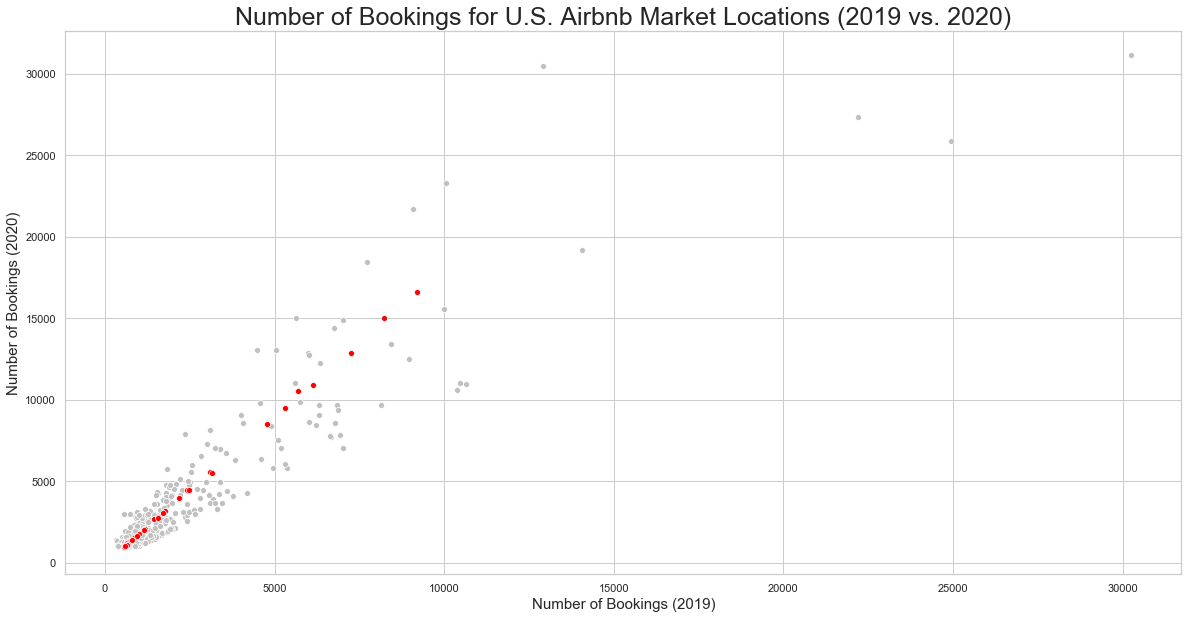

In [38]:
plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
Middle10_YoYscatter = sns.scatterplot(x=Middle10_PercentGrowth["2019"], y=Middle10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_title("Number of Bookings for U.S. Airbnb Market Locations (2019 vs. 2020)", fontsize=25);

## Red = Middle 10% Growth, markets with the "median" YoY %-change growth
# i.e. Airbnb markets that saw a significant increase in number of bookings from 2019 to 2020, but were still substantially popular in 2019.

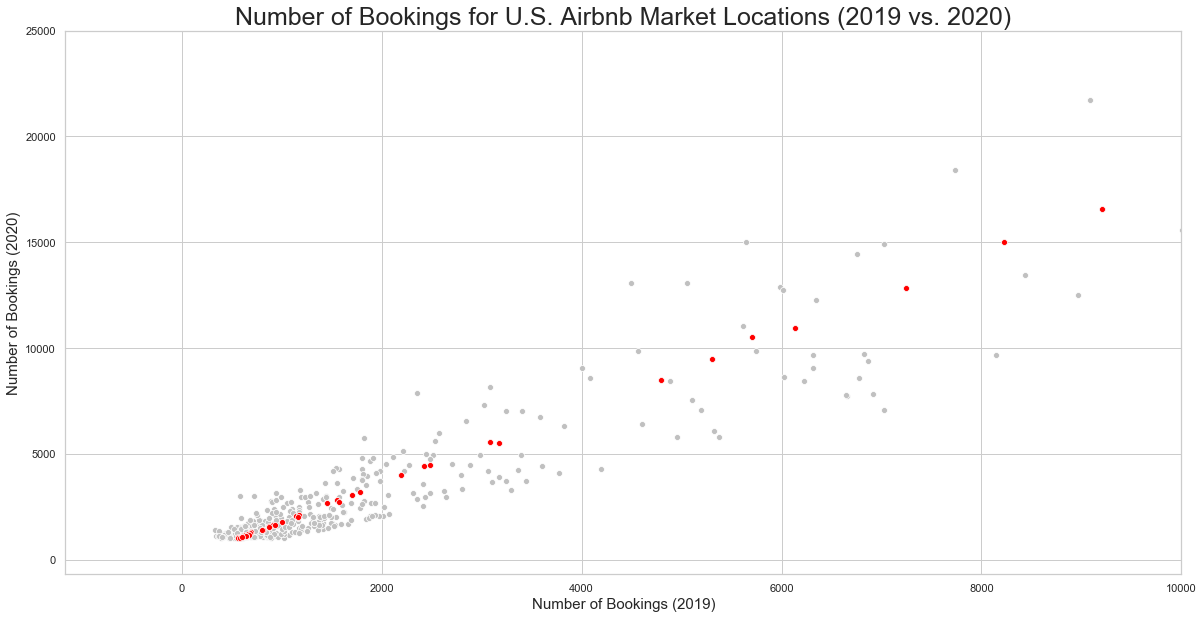

In [39]:
plt.figure(figsize=(20,10))

YoY_scatter = sns.scatterplot(x=Pos_Growth["2019"], y=Pos_Growth["2020"], color="silver");
Middle10_YoYscatter = sns.scatterplot(x=Middle10_PercentGrowth["2019"], y=Middle10_PercentGrowth["2020"], color="red");

YoY_scatter.set_ylabel("Number of Bookings (2020)", fontsize=15)
YoY_scatter.set_xlabel("Number of Bookings (2019)", fontsize=15)
YoY_scatter.set_title("Number of Bookings for U.S. Airbnb Market Locations (2019 vs. 2020)", fontsize=25);

plt.xlim(right=10000)
plt.ylim(top=25000);

# Remarkably, the red dots seem to follow a linear shape.
# Might be an opportunity to create a linear regression model for cities with comparable YoY booking data.

In [94]:
r, p = scipy.stats.pearsonr(x=Pos_Growth["2019"], y=Pos_Growth["2020"])
r, p

(0.9204588593122901, 2.7277480633802613e-165)

In [95]:
r, p = scipy.stats.pearsonr(x=Middle10_PercentGrowth["2019"], y=Middle10_PercentGrowth["2020"])
r, p

(0.9997954569293346, 5.40645283447185e-66)

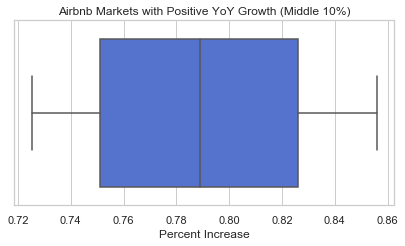

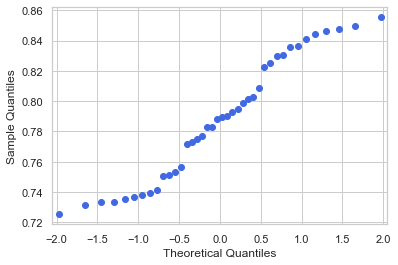

In [41]:
plt.figure(figsize=(6.8,3.4))

Middle10_YoYboxplot = sns.boxplot(x=Middle10_PercentGrowth["YoY % Change"], color="royalblue");
Middle10_YoYboxplot.set_xlabel("Percent Increase")
Middle10_YoYboxplot.set_title("Airbnb Markets with Positive YoY Growth (Middle 10%)")

sm.qqplot(Middle10_PercentGrowth["YoY % Change"], color="royalblue") 
py.show();

### Considering `YoY Raw Growth Volume`

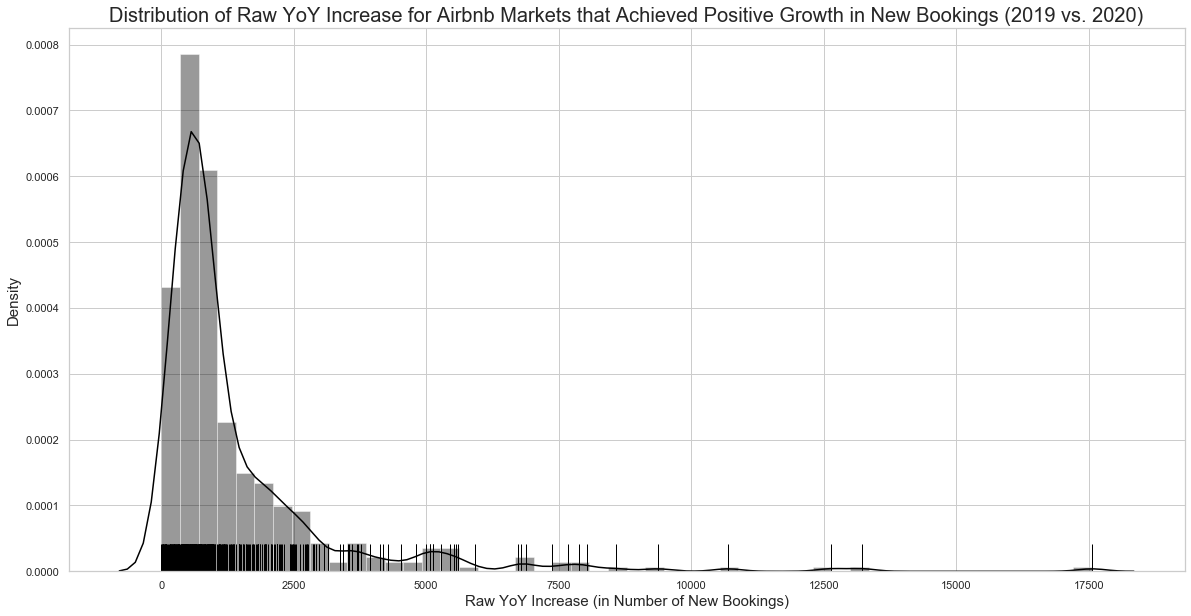

In [42]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid") 

YoY_density = sns.distplot(Pos_Growth["YoY Raw Growth Volume"], kde=True, rug=True, color="black")
YoY_density.set_ylabel("Density", fontsize=15)
YoY_density.set_xlabel("Raw YoY Increase (in Number of New Bookings)", fontsize=15)
YoY_density.set_title(
    "Distribution of Raw YoY Increase for Airbnb Markets that Achieved Positive Growth in New Bookings (2019 vs. 2020)",
fontsize=20);

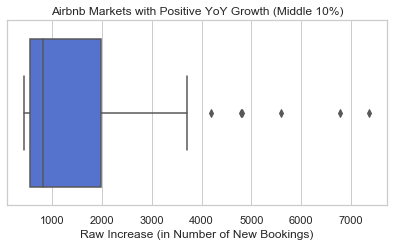

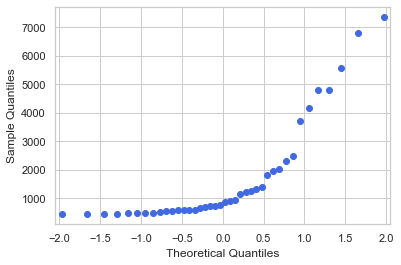

In [44]:
plt.figure(figsize=(6.8,3.4))

Middle10_YoYboxplot = sns.boxplot(x=Middle10_PercentGrowth["YoY Raw Growth Volume"], color="royalblue");
Middle10_YoYboxplot.set_xlabel("Raw Increase (in Number of New Bookings)")
Middle10_YoYboxplot.set_title("Airbnb Markets with Positive YoY Growth (Middle 10%)")

sm.qqplot(Middle10_PercentGrowth["YoY Raw Growth Volume"], color="royalblue") 
py.show();

In [45]:
Sorted_byRawGrowth = Pos_Growth.sort_values(by="YoY Raw Growth Volume", ascending=False)
Sorted_byRawGrowth.quantile(0.95)

2019                      6914.450000
2020                     12494.700000
YoY Raw Growth Volume     5121.600000
YoY % Change                 1.821175
Name: 0.95, dtype: float64

In [75]:
Top10_RawGrowth = Sorted_byRawGrowth[
    Sorted_byRawGrowth["YoY Raw Growth Volume"]>=Sorted_byRawGrowth.quantile(0.90)["YoY Raw Growth Volume"]]

Top10_RawGrowth.head(20)

## We want to consider `YoY Raw Growth Volume` alongside `YoY % Change` in our market segmentation.
## However, upon inspection of the YoY % Change column, there seems to be a very weak correlation between the two.
## This conjecture is confirmed by the following scatterplot and correlation coefficients, which follow in our previous method of taking the "Middle 10%" of Raw Growth Volumes.

2019     2020  YoY Raw Growth Volume  \
State          City                                                        
Florida        Panama City Beach   12902  30461.0                17559.0   
South Carolina Myrtle Beach        10061  23277.0                13216.0   
Tennessee      Sevierville          9090  21726.0                12636.0   
Texas          Galveston            7733  18425.0                10692.0   
California     Big Bear Lake        5640  15010.0                 9370.0   
Texas          Port Aransas         4492  13074.0                 8582.0   
               South Padre Island   5057  13081.0                 8024.0   
Florida        Saint Augustine      7022  14900.0                 7878.0   
               Destin               6751  14435.0                 7684.0   
               Saint Petersburg     9206  16583.0                 7377.0   
Arizona        Scottsdale           5988  12869.0                 6881.0   
South Carolina Hilton Head Island   8230  15019.0                 6789.0   
Tennessee      Gatlinburg           6016  12747.0                 6731.0   
Florida        Sarasota             6344  12261.0                 5917.0   
               Miramar Beach        7249  12842.0                 5593.0   
Alabama        Gulf Shores         10003  15570.0                 5567.0   
Oklahoma       Broken Bow           2358   7891.0                 5533.0   
Florida        Santa Rosa Beach     5617  11058.0                 5441.0   
Maryland       Ocean City           4566   9836.0                 5270.0   
Florida        Miami               22202  27337.0                 5135.0   

                                   YoY % Change  
State          City                              
Florida        Panama City Beach       1.360952  
South Carolina Myrtle Beach            1.313587  
Tennessee      Sevierville             1.390099  
Texas          Galveston               1.382646  
California     Big Bear Lake           1.661348  
Texas          Port Aransas            1.910508  
               South Padre Island      1.586711  
Florida        Saint Augustine         1.121903  
               Destin                  1.138202  
               Saint Petersburg        0.801325  
Arizona        Scottsdale              1.149132  
South Carolina Hilton Head Island      0.824909  
Tennessee      Gatlinburg              1.118850  
Florida        Sarasota                0.932692  
               Miramar Beach           0.771555  
Alabama        Gulf Shores             0.556533  
Oklahoma       Broken Bow              2.346480  
Florida        Santa Rosa Beach        0.968667  
Maryland       Ocean City              1.154183  
Florida        Miami                   0.231285

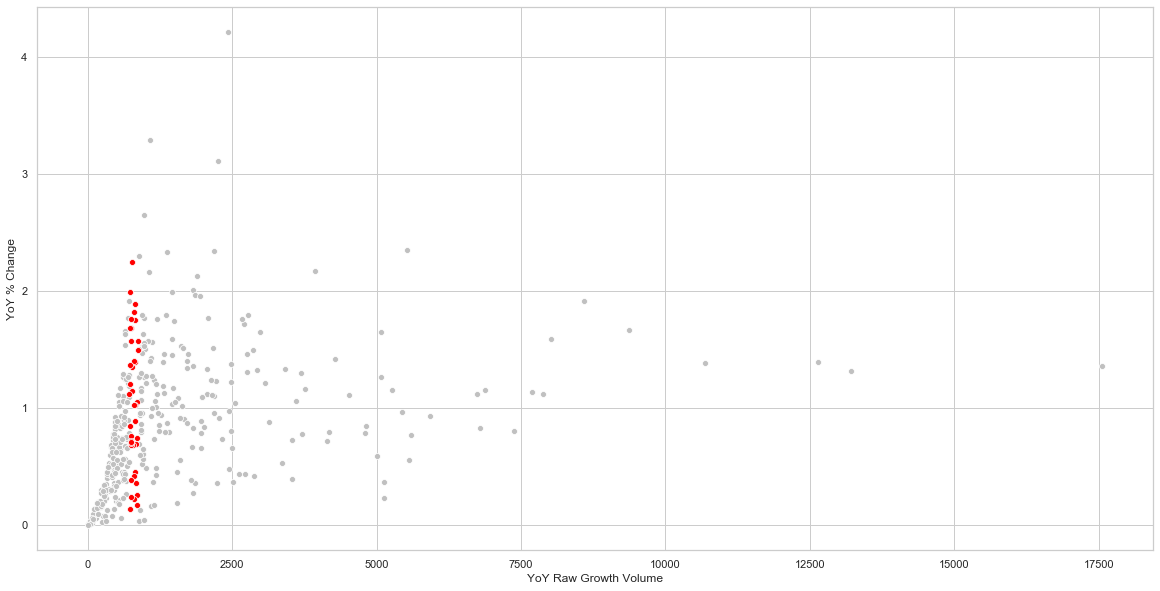

In [103]:
Middle10_RawGrowth = Sorted_byRawGrowth[
    (Sorted_byRawGrowth["YoY Raw Growth Volume"]>=Sorted_byRawGrowth.quantile(0.45)["YoY Raw Growth Volume"]) &
(Sorted_byRawGrowth["YoY Raw Growth Volume"]<=Sorted_byRawGrowth.quantile(0.55)["YoY Raw Growth Volume"])]

plt.figure(figsize=(20,10))

sns.scatterplot(x=Pos_Growth["YoY Raw Growth Volume"], y=Pos_Growth["YoY % Change"], color="silver");
sns.scatterplot(x=Middle10_RawGrowth["YoY Raw Growth Volume"], y=Middle10_RawGrowth["YoY % Change"], color="red");

In [106]:
r, p = scipy.stats.pearsonr(x=Pos_Growth["YoY Raw Growth Volume"], y=Pos_Growth["YoY % Change"])
r, p

(0.2993311808007283, 9.133911895840916e-10)

In [105]:
r, p = scipy.stats.pearsonr(x=Middle10_RawGrowth["YoY Raw Growth Volume"], y=Middle10_RawGrowth["YoY % Change"])
r, p

(-0.08326291134808617, 0.6094975322011502)

In [120]:
## To consider `YoY Raw Growth Volume` alongside `YoY % Change` more appropriately,
## let's extract the rows in `Sorted_byRawGrowth` that have values within the maximum and minimum `YoY % Change` values in the `Middle10_PercentGrowth` dataframe.

Target_SPmarkets = Sorted_byRawGrowth.loc[Sorted_byRawGrowth["YoY % Change"]<max(Middle10_PercentGrowth["YoY % Change"])]
Target_SPmarkets = Target_RawGrowth.loc[Target_RawGrowth["YoY % Change"]>min(Middle10_PercentGrowth["YoY % Change"])]
Target_SPmarkets

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
Florida,Saint Petersburg,9206,16583.0,7377.0,0.801325
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909
Florida,Miramar Beach,7249,12842.0,5593.0,0.771555
California,Palm Springs,5703,10517.0,4814.0,0.844117
Georgia,Savannah,6136,10939.0,4803.0,0.782757
Texas,Corpus Christi,5301,9486.0,4185.0,0.789474
Missouri,Branson,4793,8506.0,3713.0,0.774671
Utah,Moab,3085,5561.0,2476.0,0.802593
Florida,Naples,3171,5496.0,2325.0,0.733207


In [124]:
# Arbitrary cut-off for `YoY Raw Growth Volume` - consider locations whose raw growth is at least 1000 
Target_SPmarkets.loc[Target_SPmarkets["YoY Raw Growth Volume"]>=1000]

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
Florida,Saint Petersburg,9206,16583.0,7377.0,0.801325
South Carolina,Hilton Head Island,8230,15019.0,6789.0,0.824909
Florida,Miramar Beach,7249,12842.0,5593.0,0.771555
California,Palm Springs,5703,10517.0,4814.0,0.844117
Georgia,Savannah,6136,10939.0,4803.0,0.782757
Texas,Corpus Christi,5301,9486.0,4185.0,0.789474
Missouri,Branson,4793,8506.0,3713.0,0.774671
Utah,Moab,3085,5561.0,2476.0,0.802593
Florida,Naples,3171,5496.0,2325.0,0.733207


In [ ]:
## See SP Google Drive folder for qualitiative information and market profile research/analysis

## ELIMINATE
## Saint Petersburg: too high population density, too urban, too close to Tampa
## Durango: Avon is much closer to Denver, also Avon has a much lower population density
## Savannah: too large population density
## Corpus Christi: too large population density
## 

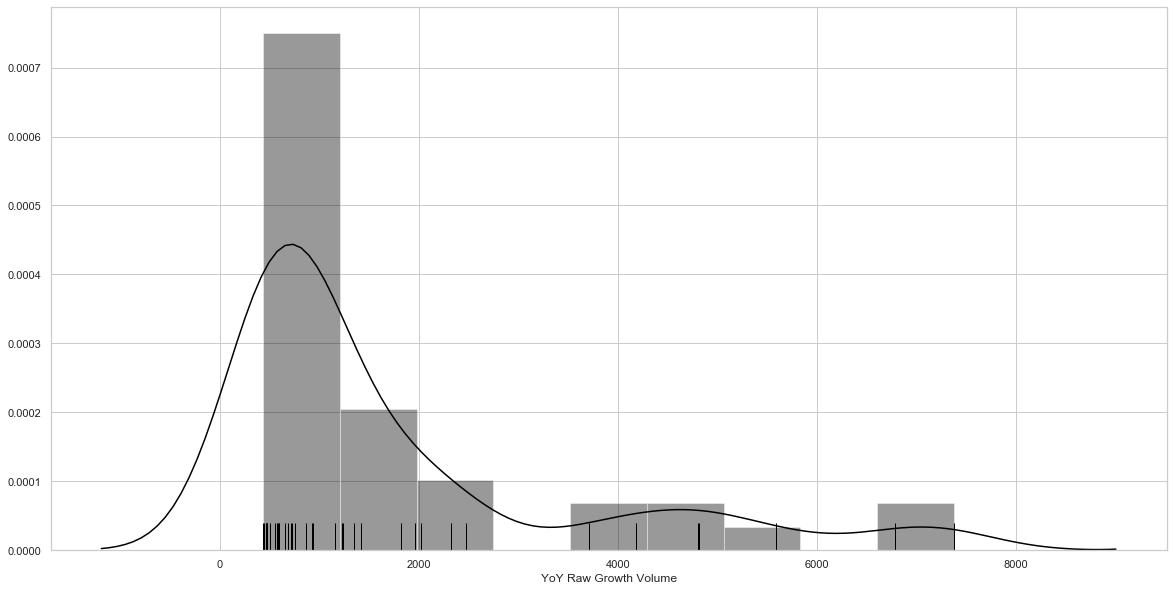

In [110]:
plt.figure(figsize=(20,10))
sns.distplot(Target_RawGrowth["YoY Raw Growth Volume"], kde=True, rug=True, color="black");

In [118]:
Target_RawGrowth.quantile(0.75)
min(Middle10_PercentGrowth["YoY % Change"])

0.725165563

In [119]:
Grouped_YoY.loc[[("California", "Palm Springs")]].head(50)

,,2019,2020,YoY Raw Growth Volume,YoY % Change
State,City,,,,
California,Palm Springs,5703,10517.0,4814.0,0.844117
